In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import pylab as py
import sys
import numpy.ma as ma
from decimal import Decimal
import os
from importlib import reload
import contours
import blobs

### Preparing the data

In [2]:
arr_all = contours.ne_all
arr_tor = arr_all.mean(2)
arr_avg = arr_tor.mean(0)
new_arr = arr_all[800,:,0,:]

### We are working with an array in the [R,Z] form. The correct way to display it is either with pcolor on a mesh or with imshow. In the case of imshow for correct display we need to take a transpose and invert the y-axis.

In [3]:
'''Define the perturbed matrix, use a nine-point smoothing and swap axes to make it in R,Z form.'''
work = (new_arr-arr_avg)/arr_avg
sw = blobs.frame_smooth(work) 
sw = np.swapaxes(sw,0,1)
work = np.swapaxes(work,0,1)

C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:295: RuntimeWarning: invalid value encountered in sign
  return abs(np.sign(x))


In [4]:
import matplotlib.tri as tri

In [5]:
from scipy.interpolate import interp2d

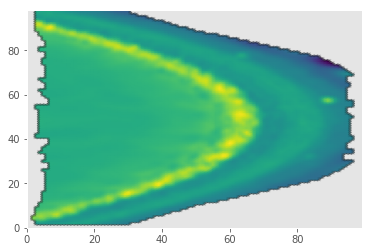

In [6]:
'''Plotting with pcolor.'''
x =  np.arange(0,sw.shape[0],1)
y = np.arange(0,sw.shape[1],1)
X,Y = np.meshgrid(x,y)
plt.pcolormesh(X,Y,sw[X,Y],shading='gouraud')
plt.show()

In [7]:
import numpy.ma as ma

In [8]:
a = ma.masked_invalid(sw)

In [9]:
at = (a.T)

In [10]:
x1 = X[~at.mask]
y1 = Y[~at.mask]
a1 = at[~at.mask]

C:\Users\giann\Anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=80,94 m=7110 fp=0.038281 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


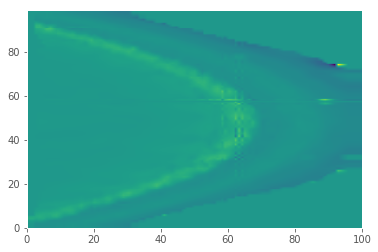

In [11]:
f = interp2d(x1, y1, a1, kind='linear')
xnew =  np.arange(0,sw.shape[0],.1)
ynew = np.arange(0,sw.shape[1],.1)
sw1 = f(xnew,ynew)
Xn, Yn = np.meshgrid(xnew, ynew)
plt.pcolor(xnew,ynew,sw1)
plt.show()

### In order to plot as an image we need to take transpose and invert the y-axis.

In [12]:
fsw = np.flipud(sw.T)

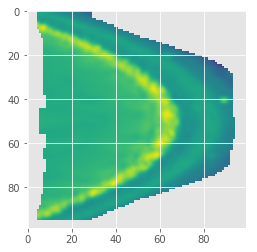

In [13]:
'''Plotting with imshow.'''
plt.imshow(fsw,interpolation = 'bicubic')

### However, flipping the matrix displays correctly with imshow But the y-axis is flipped. So, it is preferable to take the transpose, work with this matrix and then use pcolor at the display.

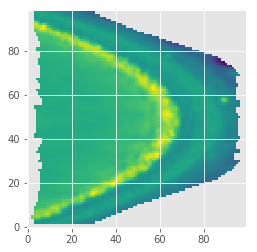

In [14]:
tsw = sw.T
plt.imshow(tsw)
plt.gca().invert_yaxis()

### To get the contours you feed the transposed matrix to the measure function. The contours then are in the form (y,x).

In [15]:
from skimage import measure

In [16]:
contours = measure.find_contours(tsw,0.11)

In [17]:
plt.rcParams["axes.grid"] = False
ax.imshow(fsw, interpolation='bilinear')
plt.gca().invert_yaxis()

NameError: name 'ax' is not defined

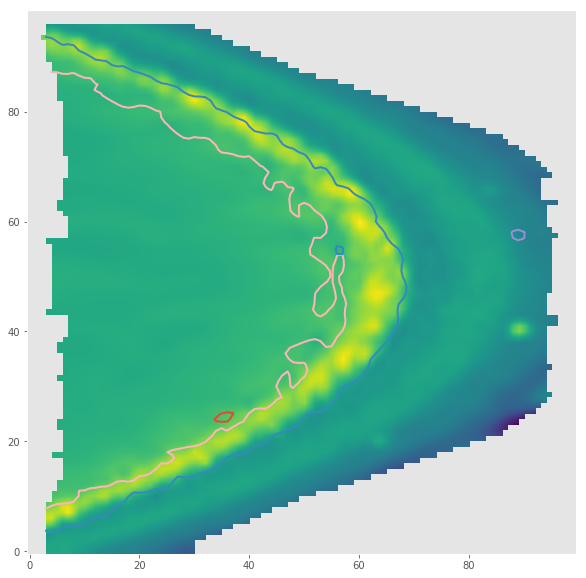

In [18]:
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(fsw, interpolation='bilinear')
#ax.pcolor(X,Y,sw[X,Y])
for contour in contours:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
plt.gca().invert_yaxis()


### Pick a very clear contour to check if the peak finding method works.

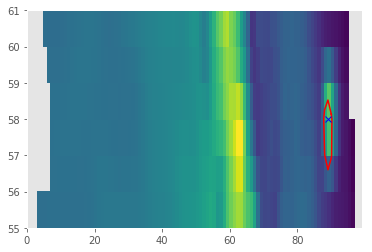

In [19]:
C = contours[9]
_,px,py = blobs.find_peak(sw,C)
plt.pcolor(X[85:92],Y[55:62],sw[X[85:92],Y[55:62]])
plt.plot(C[:,1],C[:,0],color = 'r')
plt.plot(px,py,"b",marker='x')

### We draw the conclusion that the find_contour method needs the transposed array but the find_peak method needs the original one!

### Draw all peaks and contours from a particular range.

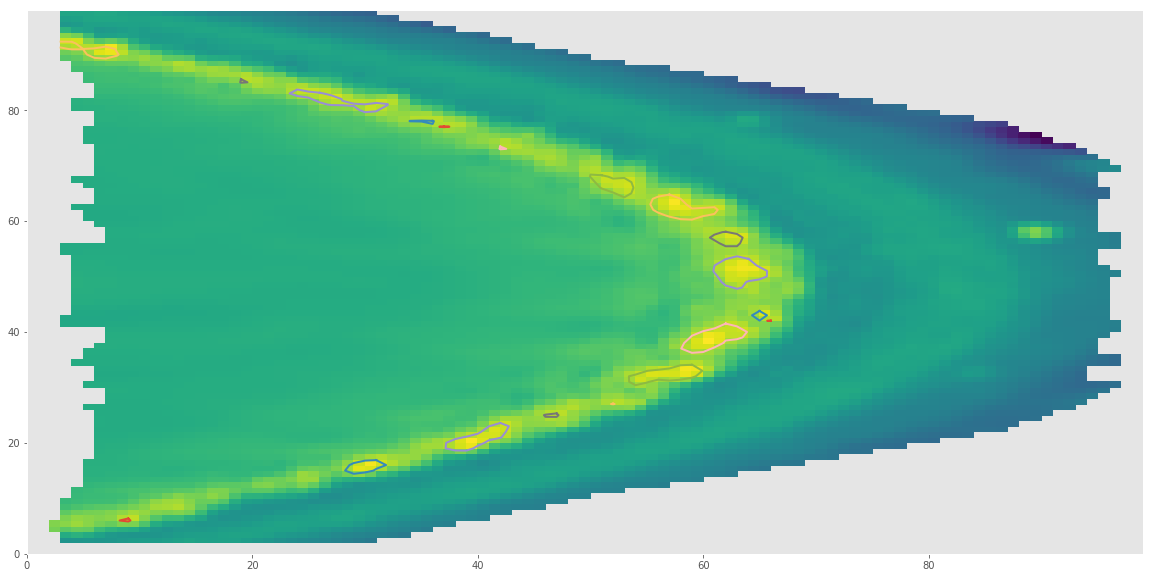

In [20]:
contoursT = measure.find_contours(tsw,0.33)
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for contour in contoursT:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)

In [21]:
reload(blobs)

<module 'blobs' from 'C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\blobs.py'>

In [22]:
peak_list, C_list = blobs.peaks(sw,0.28,0.38)

C:\Users\giann\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


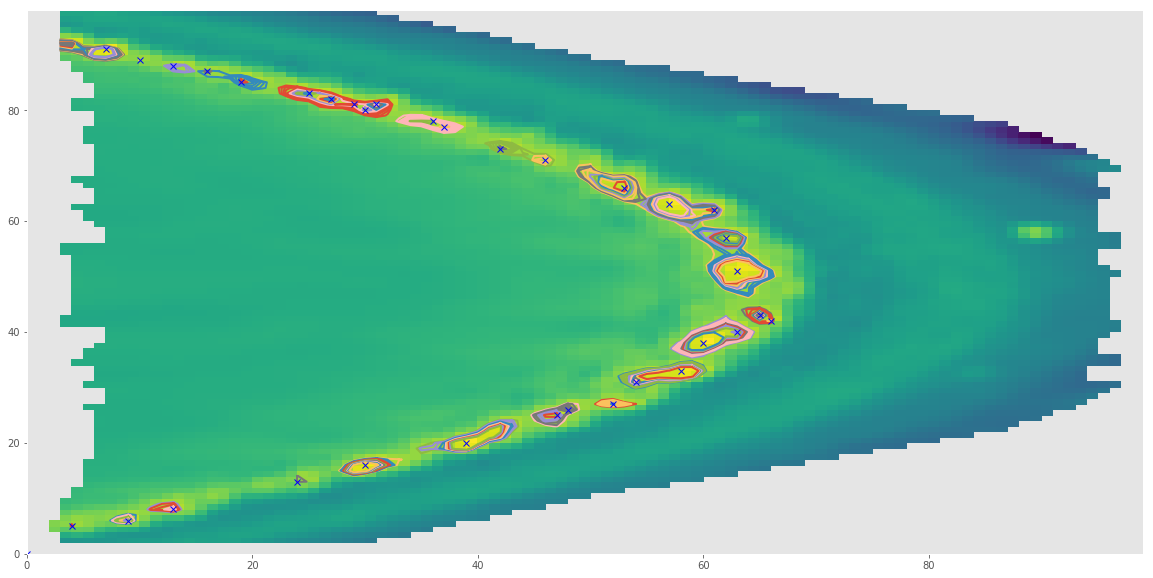

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for contours in C_list:
    for contour in contours:
        ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
for peak in peak_list:
        ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)

### Rejecting all contours that encompass more than one peak.

In [24]:
contour_list = blobs.double_peak_rejection(peak_list,C_list)

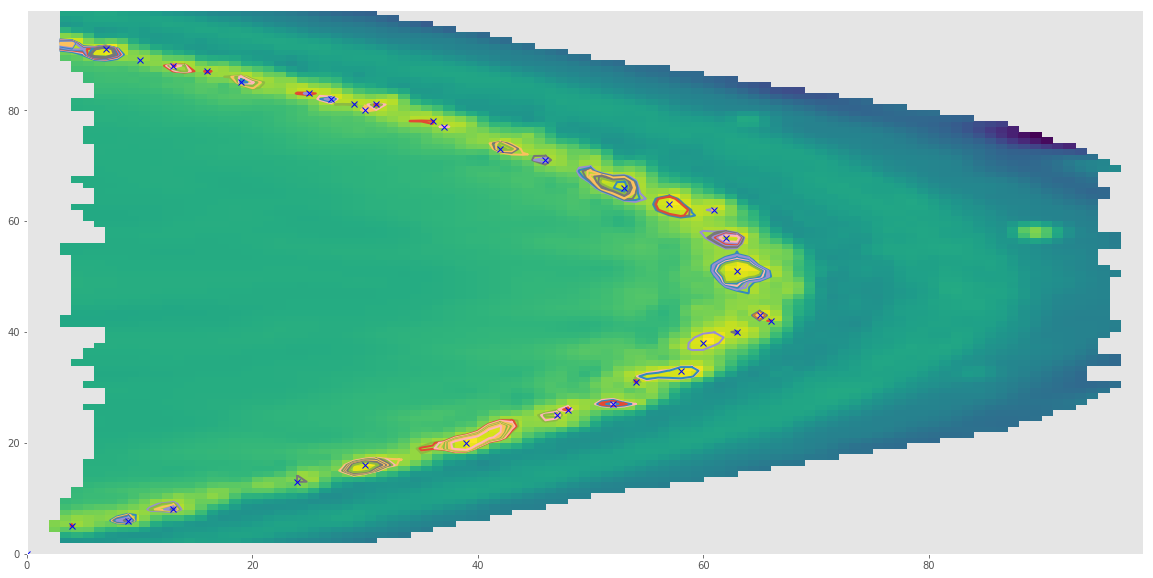

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for contour in contour_list:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
for peak in peak_list:
    ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)

### From the contours that share the same peak, keep the one with the largest area.

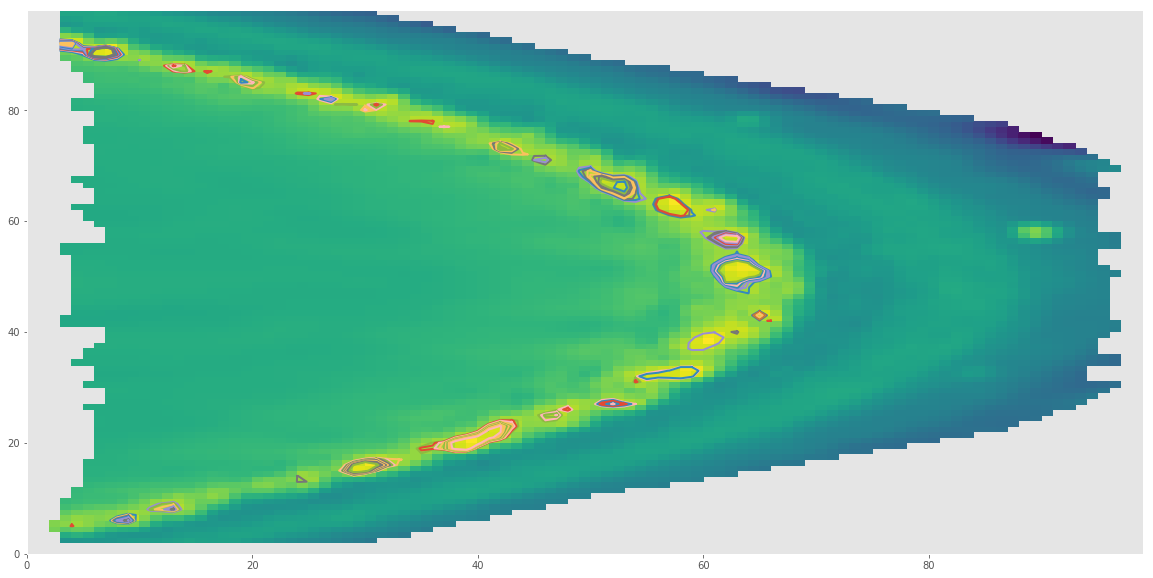

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for contour in contour_list:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)

### Check function for polygon area

In [27]:
test_list = [4,13,26,38,53,66,81,94,108,124]
tcl = []
for i in test_list:
    tcl.append(contour_list[i])

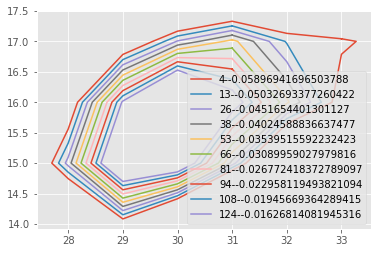

In [28]:
for i in test_list:
    area = blobs.PolyArea(contour_list[i][:,1],contour_list[i][:,0])
    plt.plot(contour_list[i][:,1],contour_list[i][:,0], label = "%s--%s" %(i,area))
plt.legend()

In [29]:
ncl = blobs.contour_reduction(peak_list, contour_list)

In [30]:
reload(blobs)

<module 'blobs' from 'C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\blobs.py'>

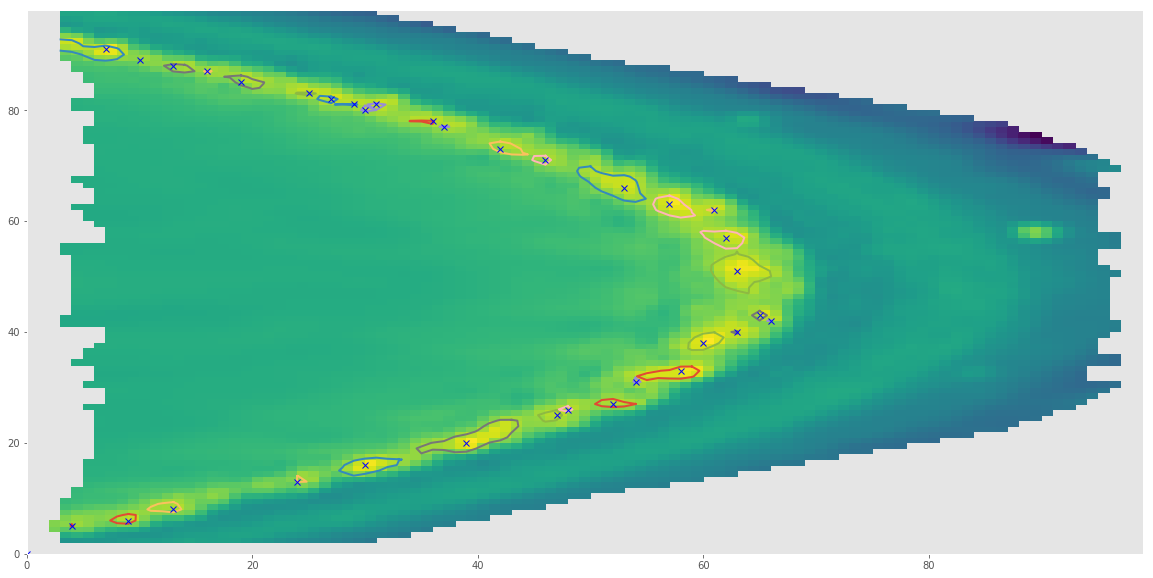

In [31]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for i in range(len(ncl)):
    contour_ind = ncl[i][0]
    contour = contour_list[contour_ind]
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
for peak in peak_list:
    ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)

### Fitting Ellipses on contours.

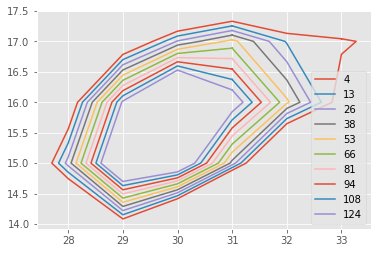

In [32]:
for i in test_list:
    plt.plot(contour_list[i][:,1],contour_list[i][:,0], label = "%s" %(i))
plt.legend()

In [33]:
reload(blobs)

<module 'blobs' from 'C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\blobs.py'>

In [34]:
numero = 128

In [35]:
el_rot1, x1, y1, t1, a1, b1 = blobs.ellipse(contour_list[numero][:,1],contour_list[numero][:,0])

case3


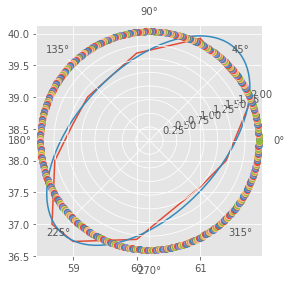

tilt: 46.72465255621754
maj: 1.993394112252206
min: 1.1383915220378333


In [36]:
fig = plt.figure()
rect = [0.1, 0.1, 0.8, 0.8]
ax_cart  = fig.add_axes(rect)
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_cart.plot(contour_list[numero][:,1],contour_list[numero][:,0])
ax_cart.plot(x1+el_rot1[0,:], y1+el_rot1[1,:])
ax_cart.set_aspect('equal')

rads = np.arange(0, (2*np.pi), 0.01)
for radian in rads:
    ax_polar.plot(radian,2,'o') 

plt.show()
print("tilt:",t1*(360/(2*np.pi)))
print("maj:", a1)
print("min:", b1)

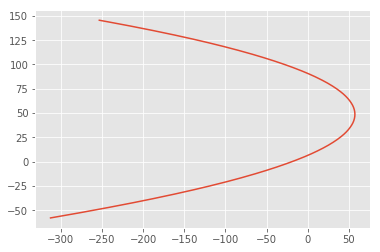

In [37]:
plt.plot(blobs.X_sep[200:500], blobs.Y_sep[200:500])
plt.show()

C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:490: RuntimeWarning: invalid value encountered in double_scalars
  x0=(c*d-b*f)/num
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:491: RuntimeWarning: invalid value encountered in double_scalars
  y0=(a*f-b*d)/num
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:510: RuntimeWarning: invalid value encountered in double_scalars
  down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:511: RuntimeWarning: invalid value encountered in double_scalars
  down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:497: RuntimeWarning: invalid value encountered in double_scalars
  down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:498: RuntimeWarning: invalid value encountered in double_scalars
  down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(

case1
case1
case2
case4
case2
case2
case3
case2
case4
case3
case2
case1
case2
case1
case1
case4
case1
case1
case4
case4
case4
case1
case4
case4
case2
case1


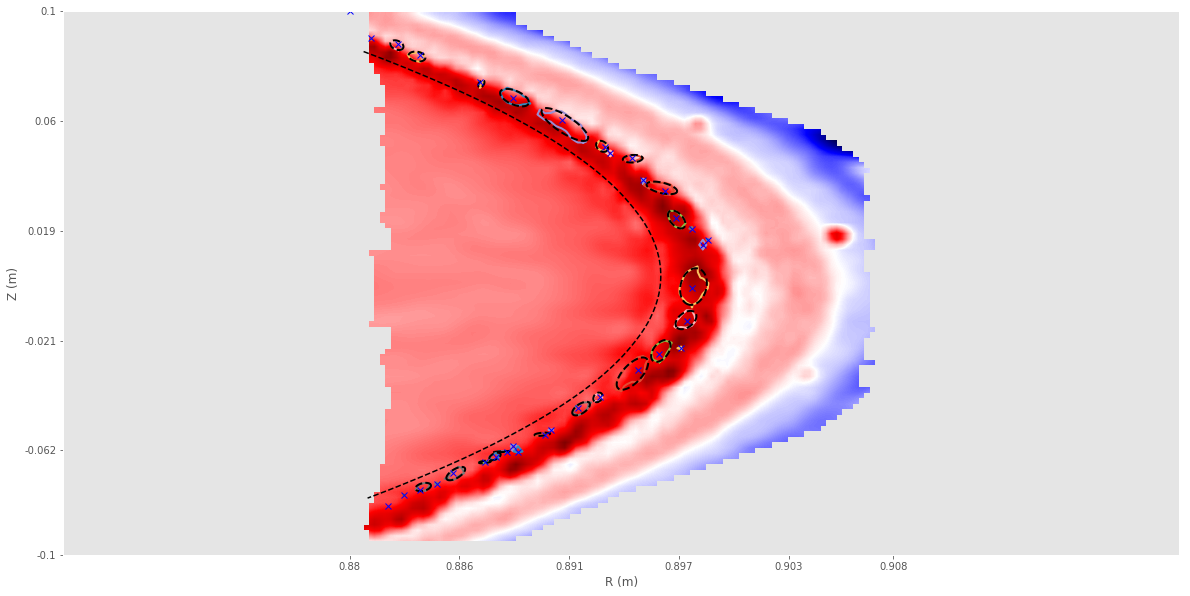

In [58]:
plt.rcParams["axes.grid"] = False
fig, ax = plt.subplots(figsize=(20,10))
#ax.pcolor(X[:],Y[:],sw[X[:],Y[:]],cmap='seismic')
ax.imshow(tsw, cmap='seismic',extent=[0,100,0,100], interpolation='bilinear')
ax.plot(blobs.X_sep[302:412],blobs.Y_sep[302:412],'k--')
for i in range(len(ncl)):
    contour_ind = ncl[i][0]
    contour = contour_list[contour_ind]
    if np.isnan(contour).any() == False:
        el_rot, x, y, t, a, b = blobs.ellipse(contour[:,1],contour[:,0])
        ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
        ax.plot(x+el_rot[0,:],y+el_rot[1,:],linewidth = 2, color = 'k',linestyle = "--")
    else:
        pass
for peak in peak_list:
    ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)
x_pos = np.linspace(0,100,100)
x_lab = np.linspace(0.88,0.908,100)
y_pos = np.linspace(0,100,100)
y_lab = np.linspace(0.1,-0.1,100)
xlab = [str(round(x_lab[0],3)),str(round(x_lab[20],3)),str(round(x_lab[40],3)),str(round(x_lab[60],3)),str(round(x_lab[80],3)),\
                                                                                                        str(round(x_lab[-1],3))]
xpos = [x_pos[0],x_pos[20],x_pos[40],x_pos[60],x_pos[80],x_pos[-1]]
ylab = [str(round(y_lab[0],3)),str(round(y_lab[20],3)),str(round(y_lab[40],3)),str(round(y_lab[60],3)),str(round(y_lab[80],3)),\
                                                                                                        str(round(y_lab[-1],3))]
ypos = [y_pos[0],y_pos[20],y_pos[40],y_pos[60],y_pos[80],y_pos[-1]]

plt.xticks(xpos,xlab)
plt.yticks(ypos,ylab)
plt.xlabel(r'R (m)')
plt.ylabel(r'Z (m)')
plt.xlim(0,100)
plt.ylim(0,100)
plt.axis('equal')
plt.gca().invert_yaxis()

### Goodness of Fit test.

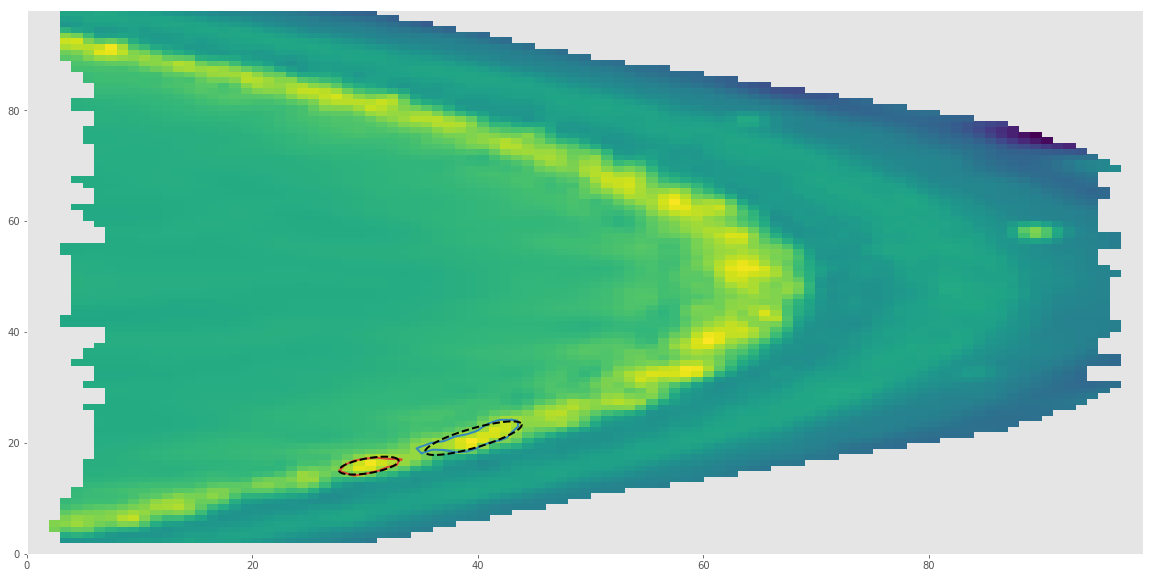

In [46]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])

good_contour_ind = ncl[1][0]
bad_contour_ind = ncl[24][0]
good_contour = contour_list[good_contour_ind]
bad_contour = contour_list[bad_contour_ind]
if np.isnan(contour).any() == False:
    el_rot_g, x_g, y_g, t_g, a_g, b_g = blobs.ellipse(good_contour[:,1],good_contour[:,0])
    el_rot_b, x_b, y_b, t_b, a_b, b_b = blobs.ellipse(bad_contour[:,1],bad_contour[:,0])
    ax.plot(good_contour[:, 1],good_contour[:, 0], linewidth=2)
    ax.plot(bad_contour[:, 1],bad_contour[:, 0], linewidth=2)
    ax.plot(x_g+el_rot_g[0,:],y_g+el_rot_g[1,:],linewidth = 2, color = 'k',linestyle = "--")
    ax.plot(x_b+el_rot_b[0,:],y_b+el_rot_b[1,:],linewidth = 2, color = 'k',linestyle = "--")
else:
    pass

In [47]:
print("Goodness of fit for good contour:",blobs.goodness_of_fit(good_contour[:,1],good_contour[:,0],x_g+el_rot_g[0,:], y_g+el_rot_g[1,:]))
print("Goodness of fit for bad contour:",blobs.goodness_of_fit(bad_contour[:,1],bad_contour[:,0],x_b+el_rot_b[0,:], y_b+el_rot_b[1,:]))

Goodness of fit for good contour: 0.6846667456195946
Goodness of fit for bad contour: 2.1773409630811953


### Full analysis of single frame.

In [48]:
reload(blobs)

<module 'blobs' from 'C:\\Users\\giann\\OneDrive\\Desktop\\Python_scrpts\\blobs.py'>

In [49]:
C_l, P_l, L_l, E_l, A_l = blobs.analyze_frame(arr_all,800,0.28,0.38)

C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:296: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i+1,j]+arr[i,j-1]+arr[i,j+1])+w3*(arr[i+1,j-1]+arr[i+1,j+1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i+1,j])+sg(arr[i,j-1])+sg(arr[i,j+1]))+w3*(sg(arr[i+1,j-1])+sg(arr[i+1,j+1]))))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:308: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i,j-1]+arr[i+1,j])+w3*(arr[i+1,j-1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i,j-1])+sg(arr[i+1,j]))+w3*(sg(arr[i+1,j-1]))))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:294: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i-1,j]+arr[i+1,j]+arr[i,j-1]+arr[i,j+1])+w3*(arr[i-1,j-1]+arr[i+1,j-1]+arr[i-1,j+1]+arr[i+1,j+1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i-1,j])+sg(arr[i+1,j])+sg(arr[i,j-1])+sg(arr[i,j+1]))+w3*(sg(arr[i-1,j-1])+sg(arr[i+1,j-1])+sg(arr[i-1,j+1

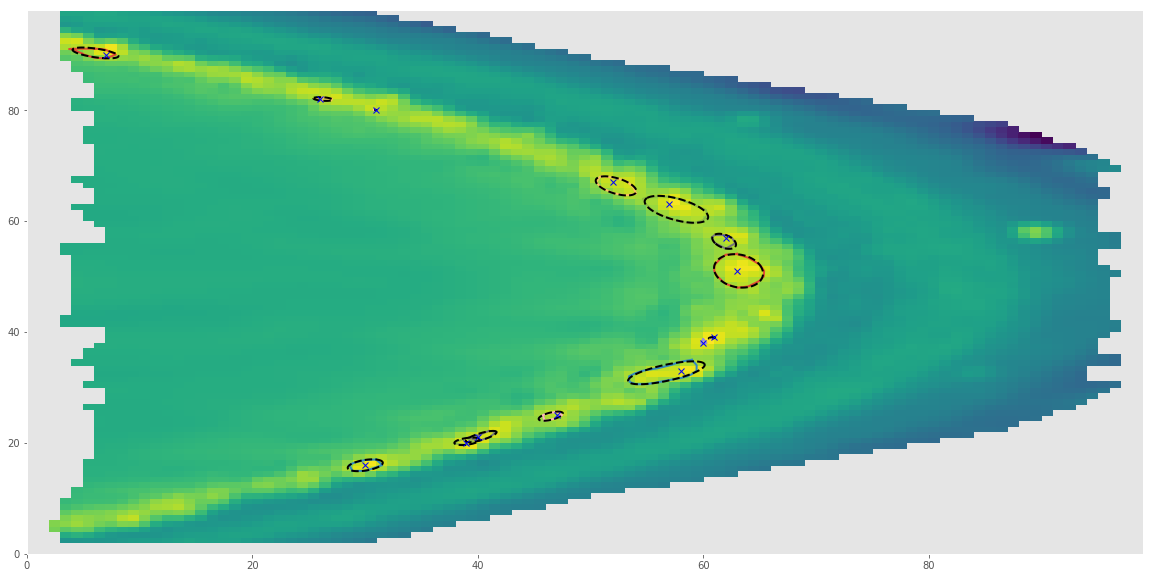

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw[X,Y])
for contour in C_l:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
for j in range(len(E_l)):
    if ~np.isnan(E_l[j][0]).any():
        ax.plot(E_l[j][1]+E_l[j][0][0], E_l[j][2]+E_l[j][0][1],linewidth = 2, color = 'k',linestyle = "--")
    else:
        pass
for peak in P_l:
    ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)

In [51]:
sw_new = blobs.prepare_data(arr_all,750)

C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:296: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i+1,j]+arr[i,j-1]+arr[i,j+1])+w3*(arr[i+1,j-1]+arr[i+1,j+1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i+1,j])+sg(arr[i,j-1])+sg(arr[i,j+1]))+w3*(sg(arr[i+1,j-1])+sg(arr[i+1,j+1]))))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:308: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i,j-1]+arr[i+1,j])+w3*(arr[i+1,j-1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i,j-1])+sg(arr[i+1,j]))+w3*(sg(arr[i+1,j-1]))))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:294: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i-1,j]+arr[i+1,j]+arr[i,j-1]+arr[i,j+1])+w3*(arr[i-1,j-1]+arr[i+1,j-1]+arr[i-1,j+1]+arr[i+1,j+1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i-1,j])+sg(arr[i+1,j])+sg(arr[i,j-1])+sg(arr[i,j+1]))+w3*(sg(arr[i-1,j-1])+sg(arr[i+1,j-1])+sg(arr[i-1,j+1

In [52]:
C_l, P_l, L_l, E_l, A_l = blobs.analyze_frame(arr_all,750,0.28,0.44)

C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:296: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i+1,j]+arr[i,j-1]+arr[i,j+1])+w3*(arr[i+1,j-1]+arr[i+1,j+1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i+1,j])+sg(arr[i,j-1])+sg(arr[i,j+1]))+w3*(sg(arr[i+1,j-1])+sg(arr[i+1,j+1]))))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:308: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i,j-1]+arr[i+1,j])+w3*(arr[i+1,j-1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i,j-1])+sg(arr[i+1,j]))+w3*(sg(arr[i+1,j-1]))))
C:\Users\giann\OneDrive\Desktop\Python_scrpts\blobs.py:294: RuntimeWarning: invalid value encountered in double_scalars
  smooth_arr.append((w1*arr[i,j]+w2*(arr[i-1,j]+arr[i+1,j]+arr[i,j-1]+arr[i,j+1])+w3*(arr[i-1,j-1]+arr[i+1,j-1]+arr[i-1,j+1]+arr[i+1,j+1]))/(w1*sg(arr[i,j])+w2*(sg(arr[i-1,j])+sg(arr[i+1,j])+sg(arr[i,j-1])+sg(arr[i,j+1]))+w3*(sg(arr[i-1,j-1])+sg(arr[i+1,j-1])+sg(arr[i-1,j+1

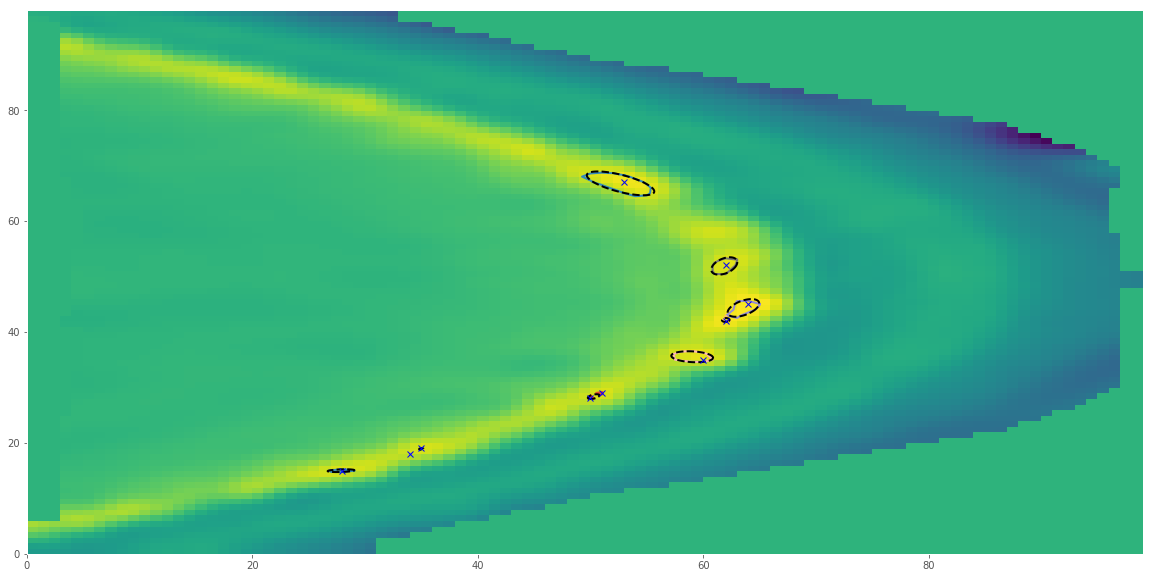

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
ax.pcolor(X,Y,sw_new[X,Y])
for contour in C_l:
    ax.plot(contour[:, 1],contour[:, 0], linewidth=2)
for j in range(len(E_l)):
    if ~np.isnan(E_l[j][0]).any():
        ax.plot(E_l[j][1]+E_l[j][0][0], E_l[j][2]+E_l[j][0][1],linewidth = 2, color = 'k',linestyle = "--")
    else:
        pass
for peak in P_l:
    ax.plot(peak[1],peak[2],"b", marker='x',markersize = 6)

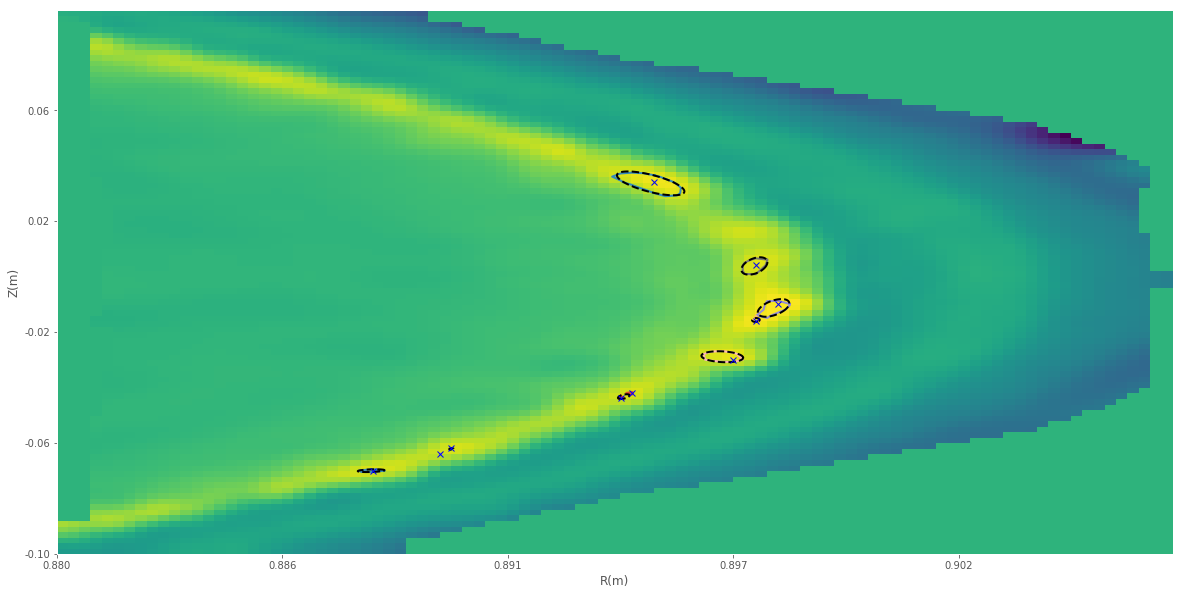

In [54]:
blobs.draw_frame(sw_new, C_l, P_l, E_l)

### Database and table creation

In [38]:
import sqlite3

In [39]:
conn = sqlite3.connect("blobs_CMOD")

In [40]:
c = conn.cursor()

In [41]:
c.execute('''CREATE TABLE IF NOT EXISTS example_key (peak_value float, peak_x float, peak_y float, area float, level float, el_x float, el_y float, tilt float, maj_ax float, min_ax float, goodness float )''')

In [42]:
for i in range(len(E_l)):
    c.execute("INSERT INTO example5 VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)", (P_l[i][0], P_l[i][1], P_l[i][2], A_l[i], L_l[i][0], E_l[i][1], E_l[i][2], E_l[i][3], E_l[i][4], E_l[i][5], E_l[i][6]))
conn.commit()

In [43]:
for row in c.execute('''SELECT ROWID,peak_value FROM example5 WHERE ROWID=3'''):
    print(row)

(3, 0.37034355636206207)


In [44]:
for i in range(0,4):
    for row in c.execute("SELECT ROWID,peak_value FROM example5 WHERE ROWID="+str(i)):
        print(row)

(1, 0.351655339698274)
(2, 0.2939093630516425)
(3, 0.37034355636206207)


In [46]:
%%capture
for row in c.execute('''SELECT ROWID,* FROM example5'''):
    print(row)

In [47]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('t_750',), ('example3',), ('example4',), ('example5',), ('ex_2',), ('ex_3',), ('ex_4',), ('t_680',), ('t_695',), ('t_696',), ('t_697',), ('t_698',), ('example_key',)]


In [48]:
#c.execute("DROP TABLE ex_1")

In [49]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('t_750',), ('example3',), ('example4',), ('example5',), ('ex_2',), ('ex_3',), ('ex_4',), ('t_680',), ('t_695',), ('t_696',), ('t_697',), ('t_698',), ('example_key',)]


In [50]:
reload(blobs)

<module 'blobs' from 'C:\\Users\\giannis\\Desktop\\Python_scrpts\\blobs.py'>

In [51]:
blobs.table_creation(arr_all, 680, 0.28,0.38)

C:\Users\giannis\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:217: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)


In [52]:
blobs.db_creation(arr_all, 695, 699, 0.28, 0.38)

C:\Users\giannis\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:218: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:217: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)


### Data Selection

In [53]:
sw_1 = blobs.prepare_data(arr_all,750)

In [54]:
sw_2 = blobs.prepare_data(arr_all,751)

In [55]:
sw_3 = blobs.prepare_data(arr_all,752)

In [56]:
C_l_1, P_l_1, L_l_1, E_l_1, A_l_1 = blobs.analyze_frame(arr_all,750,0.28,0.44)

C:\Users\giannis\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:217: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:218: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)


In [57]:
C_l_2, P_l_2, L_l_2, E_l_2, A_l_2 = blobs.analyze_frame(arr_all,751,0.28,0.44)

C:\Users\giannis\Desktop\Python_scrpts\blobs.py:218: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:217: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)


In [58]:
C_l_3, P_l_3, L_l_3, E_l_3, A_l_3 = blobs.analyze_frame(arr_all,752,0.28,0.44)

C:\Users\giannis\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:218: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)
C:\Users\giannis\Desktop\Python_scrpts\blobs.py:217: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)


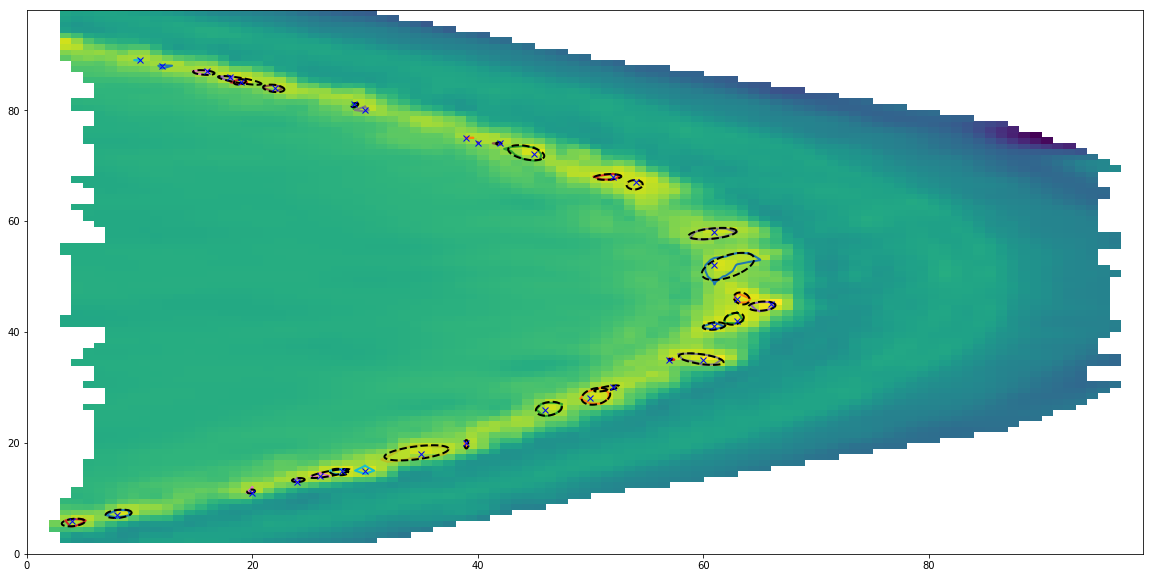

In [59]:
blobs.draw_frame(sw_1, C_l_1, P_l_1, E_l_1)

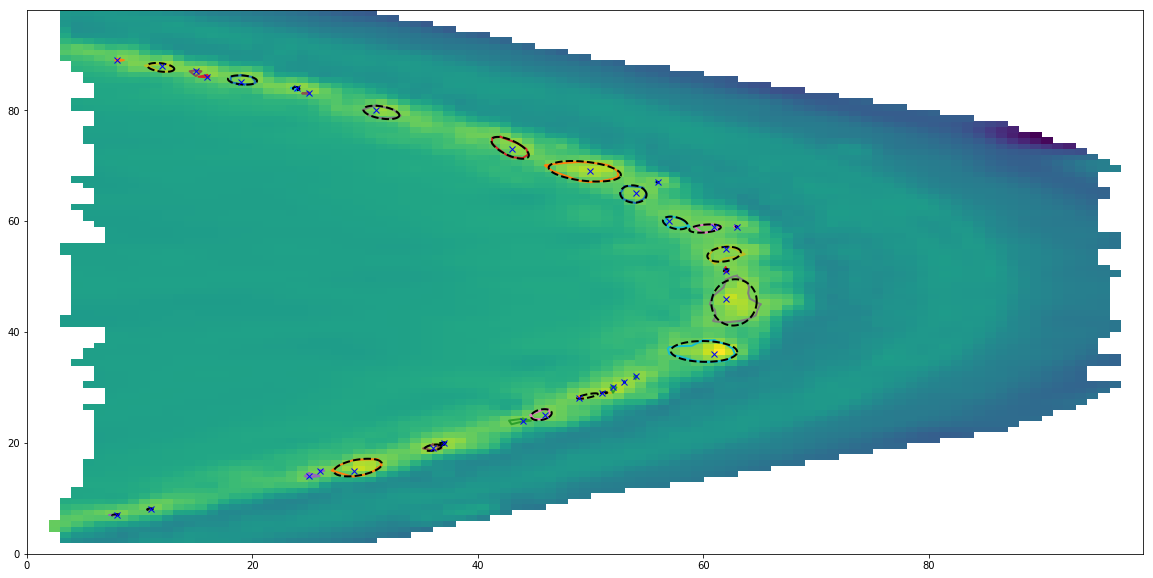

In [60]:
blobs.draw_frame(sw_2, C_l_2, P_l_2, E_l_2)

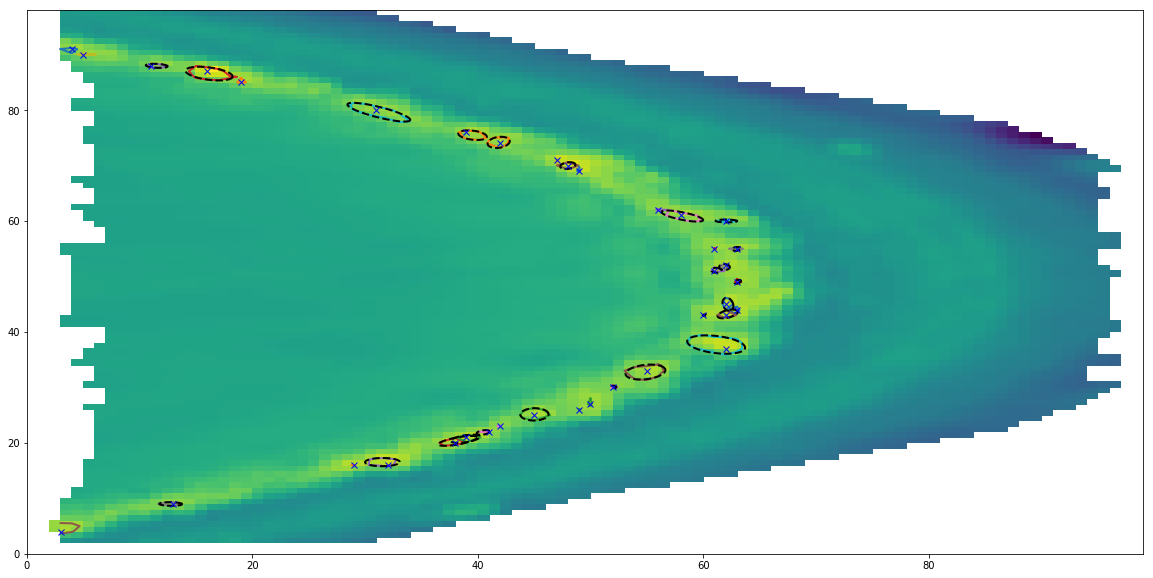

In [61]:
blobs.draw_frame(sw_3, C_l_3, P_l_3, E_l_3)